# Random Forest Regression of the defence of NFL teams through the 2018-21 seasons 


All modules and libraries imported. csv containing raw data from ProFootballReference.com is also imported and read by the pandas read function. This is defined
as df.

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
import matplotlib.colors as mcolors
from scipy.stats import rankdata
import seaborn as sns
df = pd.read_csv (r'C:\Users\Rob\Documents\Prediction.csv')
print (df)

                    Teams  G  Pts  Prediction  Prediction/G  Pts/G  P/G*17
0       Arizona Cardinals  7  156      419.10         24.65   22.3  378.86
1         Atlanta Falcons  7  163      354.03         20.83   23.3  395.86
2        Baltimore Ravens  7  181      417.33         24.55   25.9  439.57
3           Buffalo Bills  6  176      507.74         29.87   29.3  498.67
4       Carolina Panthers  7  124      257.84         15.17   17.7  301.14
5           Chicago Bears  6   93      276.56         16.27   15.5  263.50
6      Cincinnati Bengals  7  173      433.40         25.49   24.7  420.14
7        Cleveland Browns  7  168      464.37         27.32   24.0  408.00
8          Dallas Cowboys  7  134      319.45         18.79   19.1  325.43
9          Denver Broncos  7  100      339.80         19.99   14.3  242.86
10          Detroit Lions  6  146      347.52         20.44   24.3  413.67
11      Green Bay Packers  7  128      375.83         22.11   18.3  310.86
12         Houston Texans

### Scatter Graph

Scatter points scored per game and predicted points scored per game

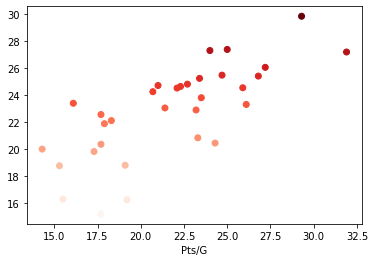

In [214]:
plt.scatter(df['Pts/G'], df['Prediction/G'], c = df['Prediction/G'], cmap = 'Reds')
plt.xlabel('Pts/G')
plt.show()

Define the columns to make the scripting quicker.

In [116]:
pg17 = df['P/G*17']
pg17 = np.array(pg17).reshape((-1,1))
pre = df['Prediction']
preg = df['Prediction/G']
preg = np.array(preg).reshape(-1,1)
pg = df['Pts/G']

### Linear Regression

Create and perform a linear regression on the per game data

In [117]:
model = LinearRegression()
model = LinearRegression().fit(preg, pg)

r_sq = model.score(preg, pg)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.5473165407302725
intercept: 0.7686812178132065
slope: [0.91671526]


In [208]:
yr_pro = df['Pts/G']*17
preg = df['Prediction']/17

### Projection and Prediction Comparison

First display the difference between the prediction and the projected points allowed. In this model it is appropriate to do this for both full year and per game data to test that they share the same correlation coefficient. The per game data is more valuable as it makes it easier to identify how diferent the predictions and projections are as points in the NFL are often 3 or 7. the numbers 2 ,6 and 8 can also occur but are less common and situational which cant be controlled for by this model.
The sum of all and squared differences should be provided also. 

In [209]:
print("difference:", pre - yr_pro)
print("SAD:", np.sum(np.abs(pre - yr_pro)))
print("SSD:", np.sum(np.square(pre - yr_pro)))
print("correlation:", np.corrcoef(np.array((pre, yr_pro)))[0, 1])

difference: 0      40.00
1     -42.07
2     -22.97
3       9.64
4     -43.06
5      13.06
6      13.50
7      56.37
8      -5.25
9      96.70
10    -65.58
11     64.73
12     45.10
13    124.08
14     41.31
15    -79.78
16    -19.20
17     31.45
18     42.75
19     63.28
20     -5.07
21      5.35
22     40.84
23     27.99
24     36.07
25    -23.38
26     58.57
27     60.53
28    -47.39
29     82.67
30    -50.62
31     67.72
dtype: float64
SAD: 1426.0800000000002
SSD: 87611.2276
correlation: 0.7398088722661882


In [210]:
print("difference:", preg - pg)
print("Sum All Differences:", np.sum(np.abs(preg - pg)))
print("Sum Squared Differences:", np.sum(np.square(preg - pg)))
print("correlation:", np.corrcoef(np.array((preg, pg)))[0, 1])

difference: 0     2.352941
1    -2.474706
2    -1.351176
3     0.567059
4    -2.532941
5     0.768235
6     0.794118
7     3.315882
8    -0.308824
9     5.688235
10   -3.857647
11    3.807647
12    2.652941
13    7.298824
14    2.430000
15   -4.692941
16   -1.129412
17    1.850000
18    2.514706
19    3.722353
20   -0.298235
21    0.314706
22    2.402353
23    1.646471
24    2.121765
25   -1.375294
26    3.445294
27    3.560588
28   -2.787647
29    4.862941
30   -2.977647
31    3.983529
dtype: float64
Sum All Differences: 83.88705882352943
Sum Squared Differences: 303.1530366782007
correlation: 0.7398088722661882


### New Dataframe

Make a new dataframe consisting of the the teams and their corresponding prediction/game subtracted by the points/game so far. 

In [212]:
Teams = ('Atlanta Falcons', 'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns', 'Indianapolis Colts', 'Arizona Cardinals', 'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions', 'Green Bay Packers', 'Houston Texans', 'Jacksonville Jaguars', 'Kansas City Chiefs', 'Miami Dolphins', 'Minnesota Vikings', 'New Orleans Saints', 'New England Patriots', 'New York Giants', 'New York Jets', 'Tennessee Titans', 'Philadelphia Eagles', 'Pittsburgh Steelers', 'Las Vegas Raiders', 'Los Angeles Rams', 'Baltimore Ravens', 'Los Angeles Chargers', 'Seattle Seahawks', 'San Francisco 49ers', 'Tampa Bay Buccaneers', 'Washington Commanders')
df1 = pd.DataFrame(columns=['Teams'])
df1['Teams'] = Teams
diff = preg - pg
df1['P/G O Diff'] = diff
df1_sorted = df1.sort_values('Teams').reset_index(drop=True)
df1_sorted

,Teams,P/G O Diff
0,Arizona Cardinals,3.315882
1,Atlanta Falcons,2.352941
2,Baltimore Ravens,3.445294
3,Buffalo Bills,-2.474706
4,Carolina Panthers,-1.351176
5,Chicago Bears,0.567059
6,Cincinnati Bengals,-2.532941
7,Cleveland Browns,0.768235
8,Dallas Cowboys,-0.308824
9,Denver Broncos,5.688235


### Barchart

plot a bar chart from the data in the new dataframe(team name and their prediction/game - points/game)

<function matplotlib.pyplot.show(close=None, block=None)>

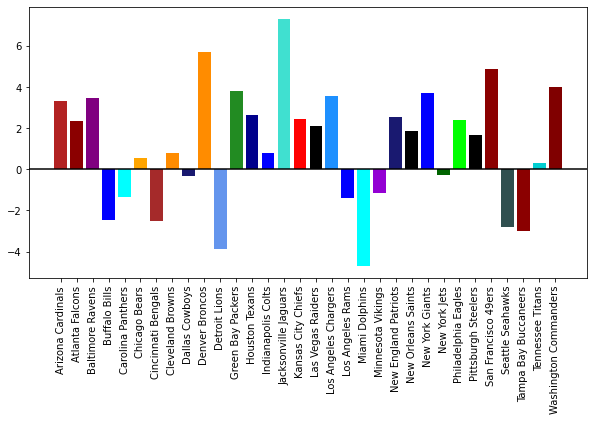

In [213]:
plt.figure(figsize=(10,5))
plt.bar(df1_sorted['Teams'], df1_sorted['P/G O Diff'],color = ['firebrick','darkred','purple','blue','cyan', 'orange', 'brown','darkorange', 'midnightblue', 'darkorange', 'cornflowerblue', 'forestgreen', 'darkblue', 'blue', 'turquoise', 'red','black','dodgerblue','blue','aqua', 'darkviolet','midnightblue','black', 'blue','darkgreen','lime','black','darkred','darkslategray','darkred','darkturquoise','maroon' ])
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.xticks(rotation=90)
plt.show

### Import Dataframe

Import the dataframe showing the teams and their points allowed differential created previously. 

In [123]:
df2 = pd.read_csv (r'C:\Users\Rob\Documents\DPredDiff.csv')
df2

,Teams,P/G Diff
0,Arizona Cardinals,1.346471
1,Atlanta Falcons,-0.131765
2,Baltimore Ravens,1.464118
3,Buffalo Bills,-0.903529
4,Carolina Panthers,-1.268235
5,Chicago Bears,-2.062941
6,Cincinnati Bengals,-0.714706
7,Cleveland Browns,1.087059
8,Dallas Cowboys,-3.148824
9,Denver Broncos,-1.874706


Compile the data from both dataframes

In [124]:
ddiff = df2['P/G Diff']
df1_sorted['P/G D Diff'] = ddiff
df1_sorted

,Teams,P/G O Diff,P/G D Diff
0,Arizona Cardinals,-3.315882,1.346471
1,Atlanta Falcons,-2.352941,-0.131765
2,Baltimore Ravens,-3.445294,1.464118
3,Buffalo Bills,2.474706,-0.903529
4,Carolina Panthers,1.351176,-1.268235
5,Chicago Bears,-0.567059,-2.062941
6,Cincinnati Bengals,2.532941,-0.714706
7,Cleveland Browns,-0.768235,1.087059
8,Dallas Cowboys,0.308824,-3.148824
9,Denver Broncos,-5.688235,-1.874706


Define the variables

In [132]:
t = df1_sorted['Teams']
o = df1_sorted['P/G O Diff']
d = df1_sorted['P/G D Diff']

### Barchart

plot a Barchart for all the data in the new dataframe so that every team has 2 plots showing their points scored and allowed differentials

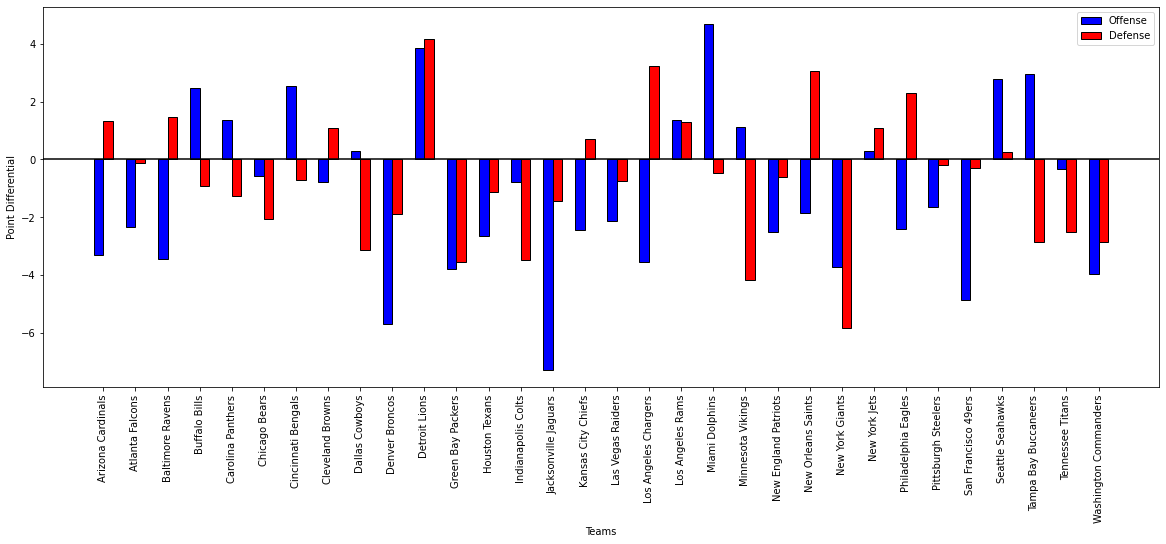

In [203]:
plt.figure(figsize=(20,7))

width = 0.3
o_bar = np.arange(len(o)) 
d_bar = [x + width for x in o_bar] 
 

plt.bar(o_bar, o, color ='blue', width = width, edgecolor ='black', label ='Offense',align='edge') 
plt.bar(d_bar, d, color ='red', width = width, edgecolor ='black', label ='Defense',align='edge') 

plt.axhline(y = 0, color = 'black', linestyle = '-')

plt.xlabel('Teams') 
plt.ylabel('Point Differential') 
plt.xticks([r + width for r in range(len(o))], t, rotation=(90)) 
plt.legend()
